Importing all required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.io

Loading Data

In [2]:
# Load data
train_class0 = scipy.io.loadmat(path+'train_class0.mat')['x']
train_class1 = scipy.io.loadmat(path+'train_class1.mat')['x']
test_class0 = scipy.io.loadmat(path+'test_class0.mat')['x']
test_class1 = scipy.io.loadmat(path+'test_class1.mat')['x']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
# Feature normalization
def normalize_features(X_train, X_val, X_test):
    mean = X_train.mean(axis=0, keepdims=True)
    print("Training Data Mean:",mean)
    std = X_train.std(axis=0, keepdims=True)
    print("Training Data Standard Deviation:",std)
    X_train_norm = (X_train - mean) / std
    X_val_norm = (X_val - mean) / std
    X_test_norm = (X_test - mean) / std
    return X_train_norm, X_val_norm, X_test_norm

X_train = np.vstack((train_class0[:1500], train_class1[:1500]))
y_train = np.vstack((np.zeros((1500, 1)), np.ones((1500, 1))))
X_val = np.vstack((train_class0[1500:], train_class1[1500:]))
y_val = np.vstack((np.zeros((500, 1)), np.ones((500, 1))))
X_test = np.vstack((test_class0, test_class1))
y_test = np.vstack((np.zeros((1000, 1)), np.ones((1000, 1))))

# Normalize features
X_train_norm, X_val_norm, X_test_norm = normalize_features(X_train, X_val, X_test)

Training Data Mean: [[1.48430283 3.15849694]]
Training Data Standard Deviation: [[3.15789702 2.38814044]]


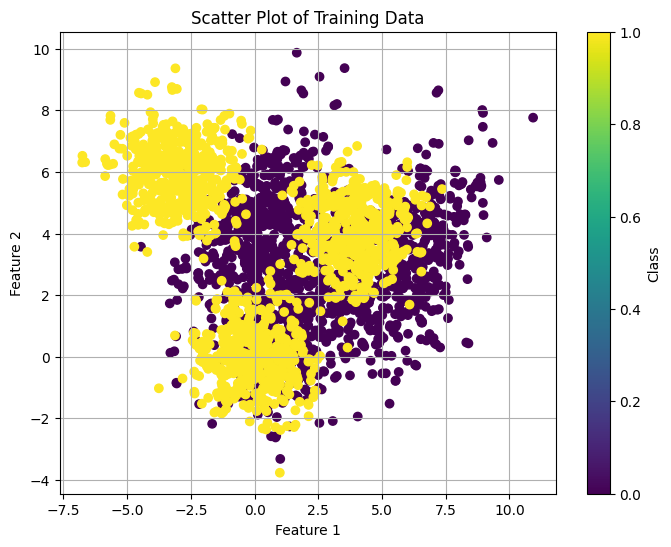

In [4]:
# Assuming X_train, y_train are your data and labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Training Data')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

MLP Implementation

Training with nH = 2
Epoch 0, Train Loss: 0.4610328342651971, Val Loss: 0.45897049689203956
Epoch 0, Train Loss: 0.3595187560028515, Val Loss: 0.3645149990772604
Epoch 0, Train Loss: 0.6824761849823495, Val Loss: 0.7238157267303288
Epoch 0, Train Loss: 0.3400490020384043, Val Loss: 0.3460227230331492
Epoch 0, Train Loss: 0.563216924746921, Val Loss: 0.6003206808800815
Average test loss: 0.2347741359619239
Average test accuracy: 0.5982


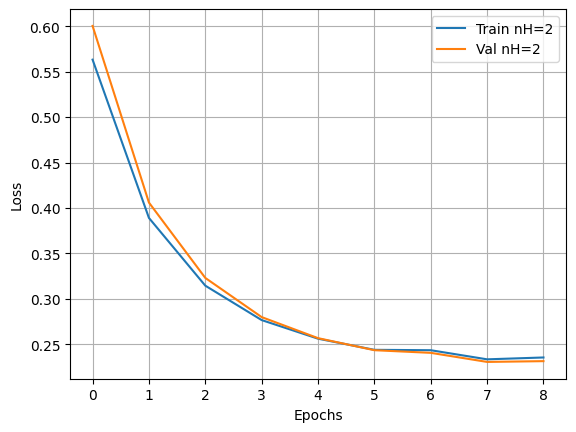

Training with nH = 4
Epoch 0, Train Loss: 0.5435194301457126, Val Loss: 0.5748415936424057
Epoch 0, Train Loss: 0.3897638966363562, Val Loss: 0.38195608023566296
Epoch 0, Train Loss: 0.5298441617050097, Val Loss: 0.5568139760085854
Epoch 0, Train Loss: 0.45696420617328054, Val Loss: 0.4711168882611078
Epoch 0, Train Loss: 0.4341701613422998, Val Loss: 0.4348278542389372
Average test loss: 0.21916909222099065
Average test accuracy: 0.6235999999999999


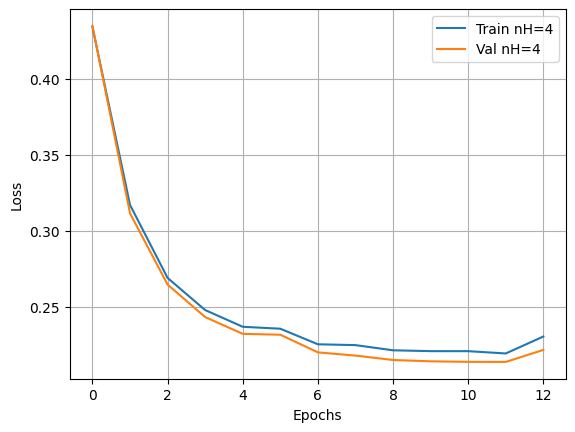

Training with nH = 6
Epoch 0, Train Loss: 0.369105150690361, Val Loss: 0.3843390256459935
Epoch 0, Train Loss: 0.7557780284332535, Val Loss: 0.8099106576466489
Epoch 0, Train Loss: 0.24559353448410162, Val Loss: 0.25737170241144464
Epoch 0, Train Loss: 0.31802682415436867, Val Loss: 0.34661590556028044
Epoch 0, Train Loss: 0.4549144532872113, Val Loss: 0.4497212094474427
Average test loss: 0.23293150715618988
Average test accuracy: 0.5934


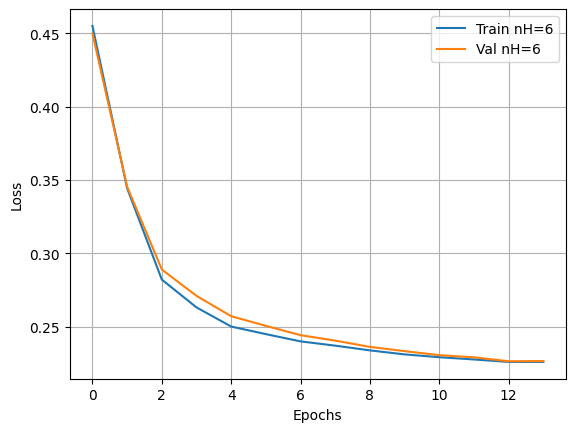

Training with nH = 8
Epoch 0, Train Loss: 0.441011200900791, Val Loss: 0.4646786862989318
Epoch 0, Train Loss: 0.7089342478371577, Val Loss: 0.7854621205718725
Epoch 0, Train Loss: 0.8448167954580431, Val Loss: 0.8997371155933831
Epoch 0, Train Loss: 0.299441680194102, Val Loss: 0.32413949571322925
Epoch 0, Train Loss: 0.47290989111863063, Val Loss: 0.5078534238108048
Average test loss: 0.2132570130636891
Average test accuracy: 0.6628000000000001


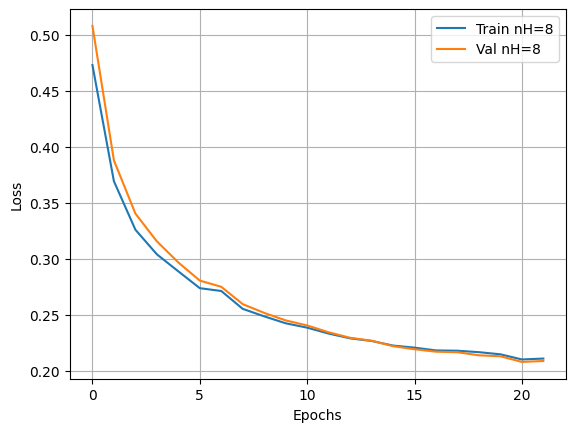

Training with nH = 10
Epoch 0, Train Loss: 0.3931320983006364, Val Loss: 0.39218271136382976
Epoch 0, Train Loss: 0.6761389101438331, Val Loss: 0.7317560253604797
Epoch 0, Train Loss: 0.5177565868384677, Val Loss: 0.552520299234483
Epoch 0, Train Loss: 0.724522169109841, Val Loss: 0.8095343736820005
Epoch 0, Train Loss: 0.43956444657307703, Val Loss: 0.44288933409280146
Average test loss: 0.20589539267259233
Average test accuracy: 0.6772


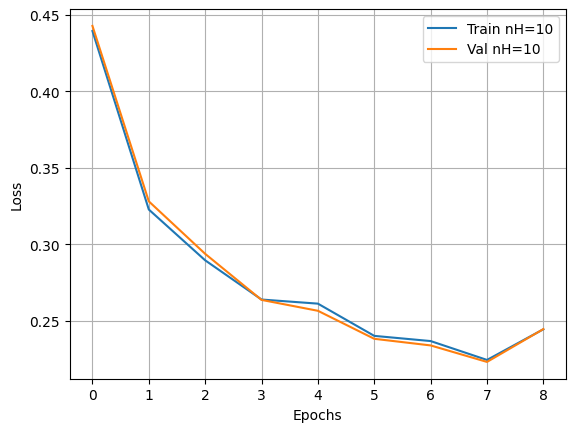

Best nH: 10 with average test loss: 0.20589539267259233
Best accuracy: 0.6772 with best nH: 10


In [32]:
# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, momentum):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.momentum = momentum

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # Initialize momentum terms
        self.v_W1 = np.zeros_like(self.W1)
        self.v_b1 = np.zeros_like(self.b1)
        self.v_W2 = np.zeros_like(self.W2)
        self.v_b2 = np.zeros_like(self.b2)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_pred = self.z2
        return self.y_pred

    def backward(self, X, y_true):
        m = y_true.shape[0]

        # Compute gradients
        dz2 = self.y_pred - y_true
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases with momentum
        self.v_W1 = self.momentum * self.v_W1 - self.learning_rate * dW1
        self.v_b1 = self.momentum * self.v_b1 - self.learning_rate * db1
        self.v_W2 = self.momentum * self.v_W2 - self.learning_rate * dW2
        self.v_b2 = self.momentum * self.v_b2 - self.learning_rate * db2

        self.W1 += self.v_W1
        self.b1 += self.v_b1
        self.W2 += self.v_W2
        self.b2 += self.v_b2

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Shuffle training data
            permutation = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]

            # Mini-batch gradient descent
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(X_batch)
                self.backward(X_batch, y_batch)

            # Calculate training and validation loss
            train_loss = mse_loss(y_train, self.forward(X_train))
            val_loss = mse_loss(y_val, self.forward(X_val))
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}')

            # Early stopping if validation loss does not decrease
            if epoch > 0 and val_losses[-1] >= val_losses[-2]:
                break

        return train_losses, val_losses

    def predict(self, X):
        return self.forward(X)


# Train the network with different nH values and multiple initializations
nH_values = [2, 4, 6, 8, 10]
num_initializations = 5
results = {}
best_accuracy = 0
best_nH_acc = 0

for nH in nH_values:
    print(f'Training with nH = {nH}')
    test_losses = []
    test_accuracies = []
    for init in range(num_initializations):
        mlp = MLP(input_size=2, hidden_size=nH, output_size=1, learning_rate=0.01, momentum=0.1)
        train_losses, val_losses = mlp.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=64)
        test_loss = mse_loss(y_test, mlp.predict(X_test))
        test_pred = mlp.predict(X_test)
        test_pred_binary = (test_pred > 0.5).astype(int)
        test_accuracy = np.mean(test_pred_binary == y_test)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
    results[nH] = (train_losses, val_losses, np.mean(test_losses),np.mean(test_accuracies))
    print(f'Average test loss: {results[nH][2]}')
    print(f'Average test accuracy: {results[nH][3]}')
    train_losses, val_losses, avg_test_loss, avg_test_accuracy = results[nH]
    plt.plot(train_losses, label=f'Train nH={nH}')
    plt.plot(val_losses, label=f'Val nH={nH}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    plt.show()

# Report the best nH
best_nH = min(results, key=lambda nH: results[nH][2])
best_nH_acc = max(results, key=lambda nH: results[nH][3])
print(f'Best nH: {best_nH} with average test loss: {results[best_nH][2]}')
print(f'Best accuracy: {results[best_nH_acc][3]} with best nH: {best_nH_acc}')